# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [4]:
print(len(df["YEAR"].unique()))

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [30]:
mi = df[df["STATE"] == "MICHIGAN"]
oh = df[df["STATE"] == "OHIO"]

mi_scores = [score for score in mi["AVG_MATH_8_SCORE"].values if not np.isnan(score)]
oh_scores = [score for score in oh["AVG_MATH_8_SCORE"].values if not np.isnan(score)]

if sum(mi_scores)/len(mi_scores) > sum(oh_scores)/len(oh_scores):
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [33]:
year = df[df["YEAR"] == 2019]
scores = [score for score in df["AVG_MATH_8_SCORE"].values if not np.isnan(score)]
print(sum(scores)/len(scores))

278.28073089700996


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [37]:
states = df["STATE"].unique()
for state in states:
    state_df = df[df["STATE"] == state]
    print(str(state) + ": " + str(max([score for score in state_df["AVG_MATH_8_SCORE"].values if not np.isnan(score)])))

ALABAMA: 269.0
ALASKA: 283.0
ARIZONA: 283.0
ARKANSAS: 279.0
CALIFORNIA: 277.0
COLORADO: 292.0
CONNECTICUT: 289.0
DELAWARE: 284.0
DISTRICT_OF_COLUMBIA: 269.0
FLORIDA: 281.0
GEORGIA: 281.0
HAWAII: 281.0
IDAHO: 287.0
ILLINOIS: 285.0
INDIANA: 288.0
IOWA: 286.0
KANSAS: 290.0
KENTUCKY: 282.0
LOUISIANA: 273.0
MAINE: 289.0
MARYLAND: 288.0
MASSACHUSETTS: 301.0
MICHIGAN: 280.0
MINNESOTA: 295.0
MISSISSIPPI: 274.0
MISSOURI: 286.0
MONTANA: 293.0
NEBRASKA: 288.0
NEVADA: 278.0
NEW_HAMPSHIRE: 296.0
NEW_JERSEY: 296.0
NEW_MEXICO: 274.0
NEW_YORK: 283.0
NORTH_CAROLINA: 286.0
NORTH_DAKOTA: 293.0
OHIO: 290.0
OKLAHOMA: 279.0
OREGON: 285.0
PENNSYLVANIA: 290.0
RHODE_ISLAND: 284.0
SOUTH_CAROLINA: 282.0
SOUTH_DAKOTA: 291.0
TENNESSEE: 280.0
TEXAS: 290.0
UTAH: 287.0
VERMONT: 295.0
VIRGINIA: 290.0
WASHINGTON: 290.0
WEST_VIRGINIA: 274.0
WISCONSIN: 289.0
WYOMING: 289.0
DODEA: 293.0
NATIONAL: 285.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [38]:
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]

Feature engineering justification: **This feature was added to the dataset to better visualize any potential correlation between average student performance in school and average expenditure pre student in US states.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot: title={'center': '8th grade math performace vs. expenditure per student'}, xlabel='expenditure_per_student', ylabel='AVG_MATH_8_SCORE'>

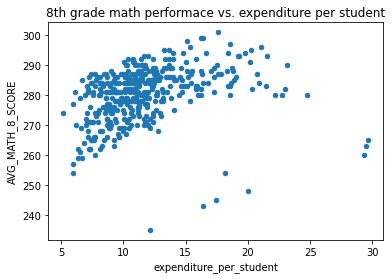

In [40]:
df.plot.scatter(x="expenditure_per_student", y="AVG_MATH_8_SCORE", title="8th grade math performace vs. expenditure per student")

**8th grade math performace vs. expenditure per student (ALL STATES)**

**Visualization 2**

<AxesSubplot: title={'center': '8th grade math performace vs. expenditure per student'}, xlabel='YEAR', ylabel='AVG_MATH_8_SCORE'>

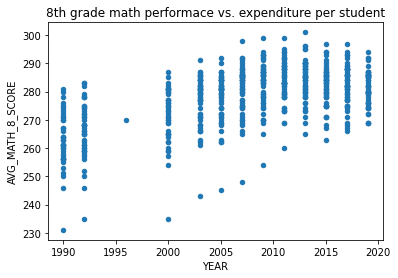

In [41]:
df.plot.scatter(x="YEAR", y="AVG_MATH_8_SCORE", title="8th grade math performace vs. expenditure per student")

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [75]:
from sklearn.model_selection import train_test_split

In [101]:
X = df["expenditure_per_student"].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
# create your model here
model = LinearRegression()

In [105]:
model.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [106]:
y_pred = model.predict(np.array(X_test).reshape(-1,1))
print(model.intercept_)
print(model.coef_)

278.59895744137793
[0.1977729]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [113]:
print(model.score(np.array(X_test).reshape(-1,1), y_test))
print(np.mean(model.predict(np.array(X_test).reshape(-1,1))-y_test))

-0.024090810591800516
0.9553550076984294


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

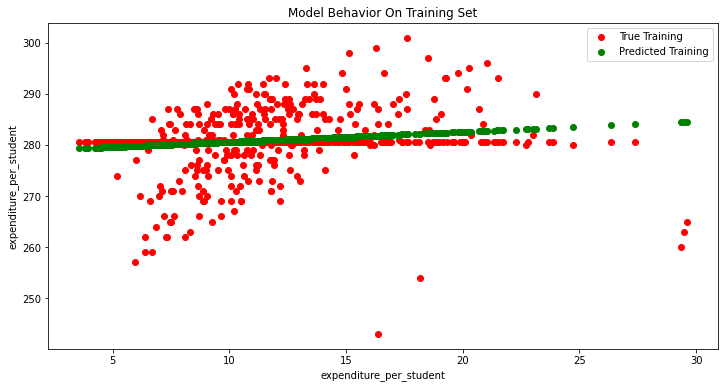

In [116]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, model.predict(np.array(X_train).reshape(-1,1)), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('expenditure_per_student')
plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Because I chose to analalyze only one predictor, there was only a small, but significant correlation between it and the average 8th grade math score for states. The model did manage to find a fairly accurate trendline using linear regression on the data, but it could have performed better given a large sample size of data (since much had to be omitted) and more predictors.

Overall though, there was a clear trend indicated by the model that total expenditure per student does positively correlate with average 8th grade student performance in math across all US states as a whole.